In [28]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Define the directory path
directory_path = r"C:\Users\13529\Desktop\project ml"

# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

In [21]:
train=files[0:9]
test=files[9:10]

In [23]:
train

['All_Traffic 2011.csv',
 'All_Traffic 2012.csv',
 'All_Traffic 2013.csv',
 'All_Traffic 2014.csv',
 'All_Traffic 2015.csv',
 'All_Traffic 2016.csv',
 'All_Traffic 2017.csv',
 'All_Traffic 2018.csv',
 'All_Traffic 2019.csv']

In [22]:
test

['All_Traffic 2020.csv']

In [19]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns='log_carloads', inplace=False)
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns='log_carloads', inplace=False)
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

# Concatenate all the data into DataFrames
x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)

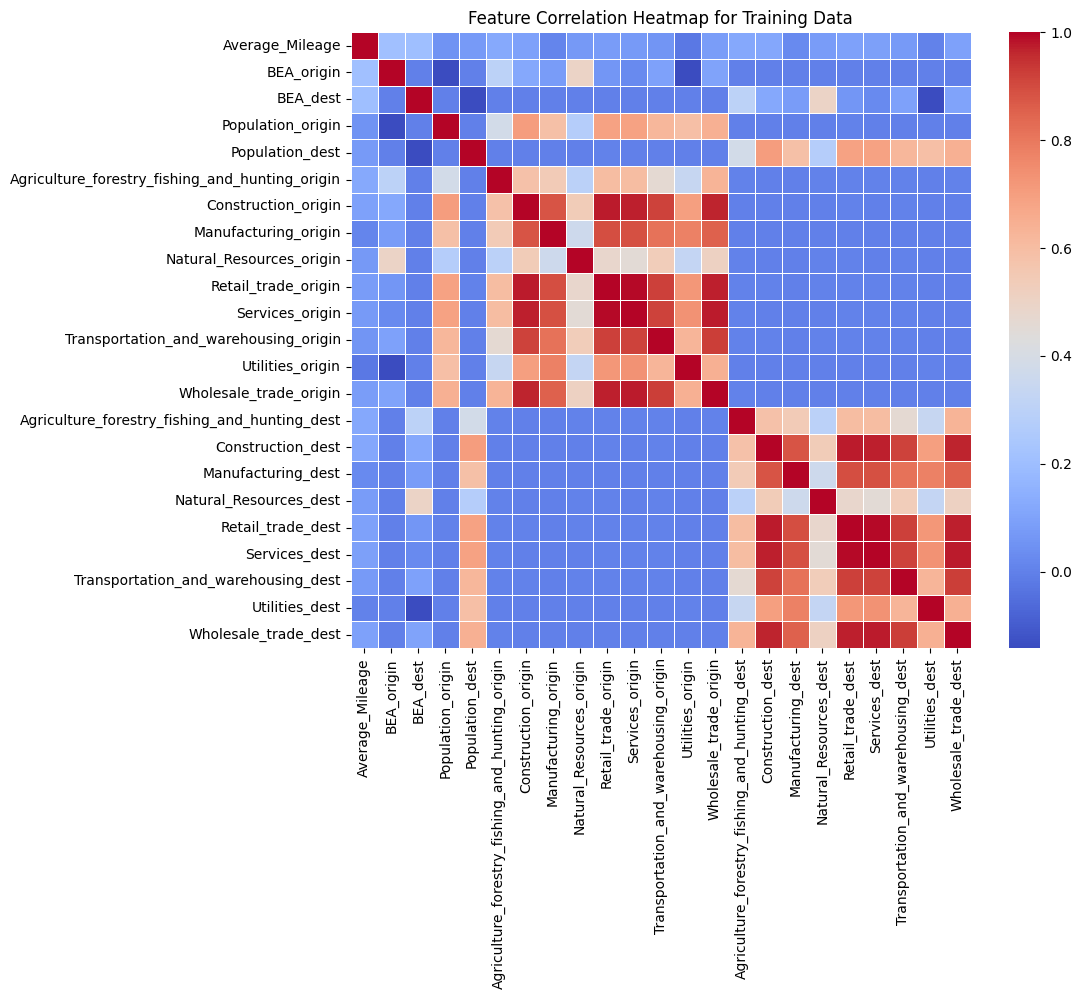

In [32]:
import seaborn as sns
correlation_matrix = x_train_All_Traffic.corr()

# Generate the heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the heatmap
plt.title("Feature Correlation Heatmap for Training Data")
plt.show()

In [24]:
#rf for others
from sklearn.ensemble import RandomForestRegressor
rf_model_All_Traffic = RandomForestRegressor( random_state=42)
rf_model_All_Traffic.fit(x_train_All_Traffic, y_train_All_Traffic)
y_pred_All_Traffic=rf_model_All_Traffic.predict(x_test_All_Traffic)

In [25]:
y_test_All_Traffic = y_test_All_Traffic.reset_index(drop=True)

In [29]:
mse_All_Traffic = mean_squared_error(y_test_All_Traffic, y_pred_All_Traffic)
print("All_Traffic Mean squared error:")
print(mse_All_Traffic)
R_All_Traffic=r2_score(y_test_All_Traffic,y_pred_All_Traffic)
print("All traffic R square is")
print(R_All_Traffic)
print("----------------------------")

All_Traffic Mean squared error:
4.096188046331766
All traffic R square is
0.7205896746311182
----------------------------


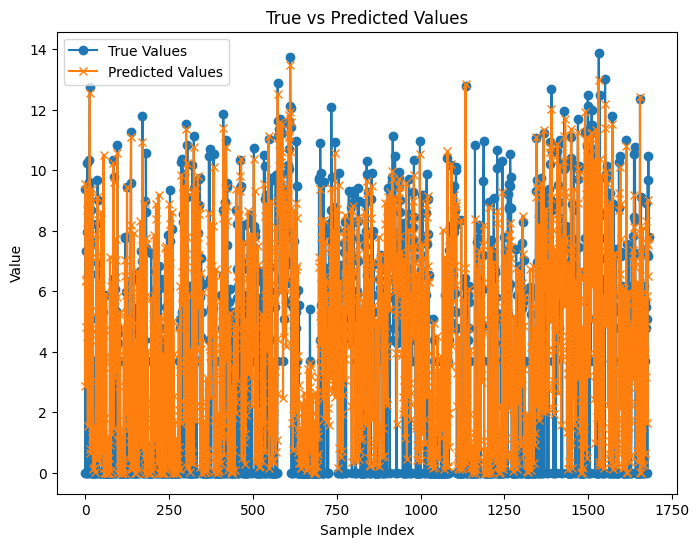

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(y_test_All_Traffic, label='True Values', marker='o')
plt.plot(y_pred_All_Traffic, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

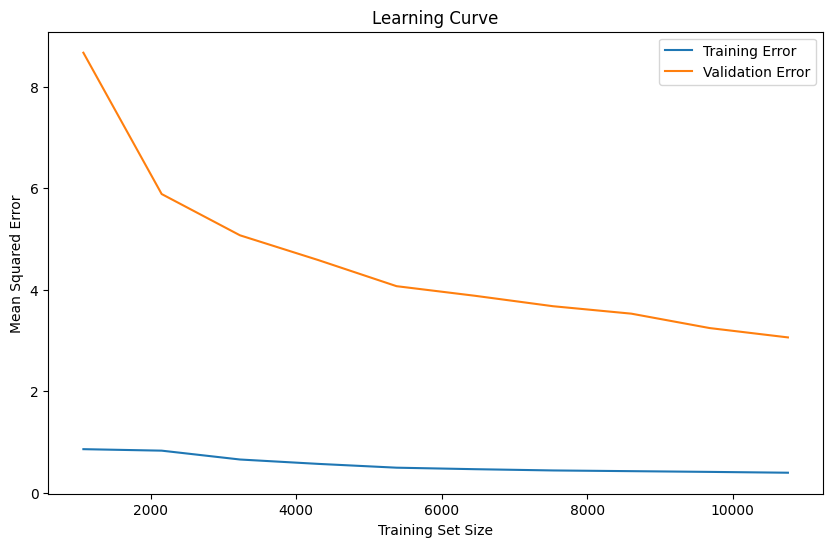

In [33]:
from sklearn.model_selection import learning_curve
import numpy as np

# Example: Using a Random Forest for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100, random_state=42), 
    x_train_All_Traffic, y_train_All_Traffic, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

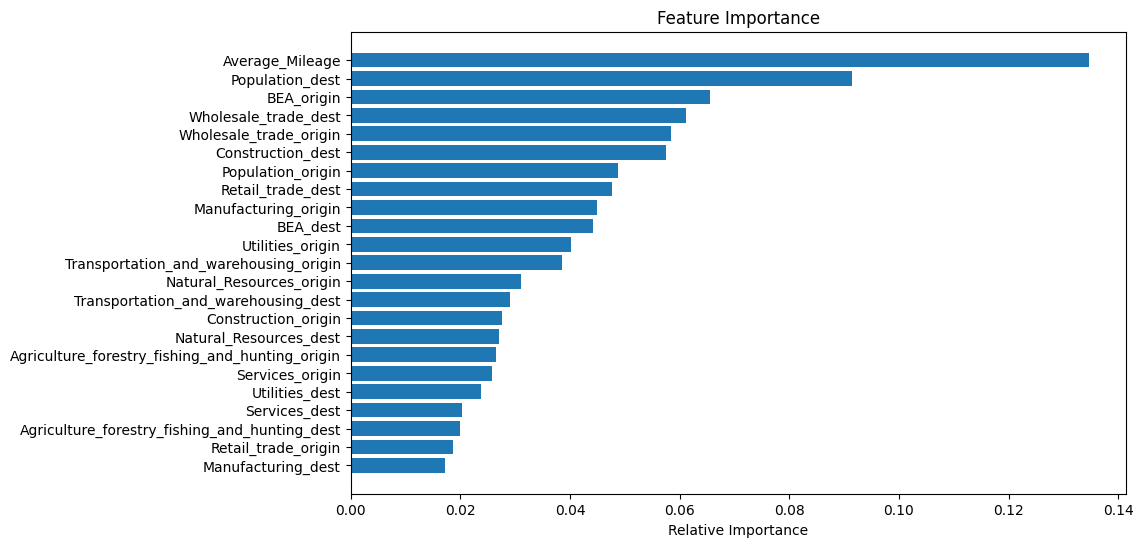

In [34]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Example: Train a RandomForest model on your training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_All_Traffic, y_train_All_Traffic)

# Get feature importances and plot
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [x_train_All_Traffic.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
